### Using Dummy Variable to use categorical features to predict

In [ ]:
#use pd.get_dummies(df)

In [9]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm;
import matplotlib.pyplot as plt 
%matplotlib inline 

df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [10]:
# make get dummy of neighbor hood coulmn.

df[['A','B','C']]=pd.get_dummies(df['neighborhood'])
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C
0,1112,B,1188,3,2,ranch,598291,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,1,0
2,5952,B,1134,3,2,ranch,571669,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,0
4,5108,B,2208,6,4,victorian,1101539,0,1,0


In [11]:
df['intercept'] = 1

In [12]:
# predict the model using all three levels of neighborhood 

lm = sm.OLS(df['price'],df[['intercept','A','B','C']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     654.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:40:17   Log-Likelihood:                -87083.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6024   BIC:                         1.742e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.301e+17   6.17e+17      0.535      0.593    -8.8e+17    1.54e+18
A          -3.301e+17   6.17e+17     -0.535      0.593   -1.54e+18     8.8e+17
B          -3.301e+17   6.17e+17     -0.535      0.593   -1.54e+18     8.8e+17
C          -3.301e+17   6.17e+17     -0.535      0.593   -1.54e+18     8.8e+17
==============================================================================
Omnibus:                      704.095   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.183
Skew:                           0.805   Prob(JB):                    4.37e-258
Kurtosis:                       4.459   Cond. No.                     2.44e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [5]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,intercept
0,1112,B,1188,3,2,ranch,598291,0,1,0,1
1,491,B,3512,5,3,victorian,1744259,0,1,0,1
2,5952,B,1134,3,2,ranch,571669,0,1,0,1
3,3525,A,1940,4,2,ranch,493675,1,0,0,1
4,5108,B,2208,6,4,victorian,1101539,0,1,0,1


In [13]:
# drop A 
# it means neighborhood A as baseline 
lm = sm.OLS(df['price'],df[['intercept','B','C']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:40:20   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

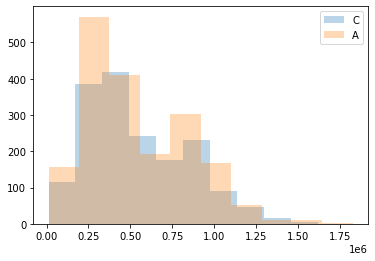

In [14]:
# 3. A and C neighborhoods 
#  add neighborhood B 

plt.hist(df.query('C == 1')['price'], alpha=0.3,label='C')
plt.hist(df.query('A==1')['price'],alpha=0.3,label='A')

plt.legend()

In [15]:
df['style'].unique()

array(['ranch', 'victorian', 'lodge'], dtype=object)

In [16]:
type_dummies = pd.get_dummies(df['style'])

df = df.join(type_dummies)



In [17]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,intercept,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,0,1,0,1,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,1,0,1,0,0,1
2,5952,B,1134,3,2,ranch,571669,0,1,0,1,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,0,1,0,1,0
4,5108,B,2208,6,4,victorian,1101539,0,1,0,1,0,0,1


In [18]:
lm = sm.OLS(df['price'],df[['intercept','victorian','lodge','bathrooms','bedrooms','B','C']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:41:20   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.833e+05    1.2e+04    -31.995      0.000   -4.07e+05    -3.6e+05
victorian   7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
lodge       1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""